In [1]:
from IPython.display import HTML
css_file = './custom.css'
HTML(open(css_file, "r").read())

# Decision Trees

© 2018 Daniel Voigt Godoy

In [2]:
from intuitiveml.supervised.classification.DecisionTree import *
from intuitiveml.utils import gen_button

## 1. Definition

From the Scikit-Learn [website](https://scikit-learn.org/stable/modules/tree.html):
    
    Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A bit more informally: A decision tree is a model that ***splits*** the ***feature space*** in such a way that ***samples similar to each other*** end up together. In other words, it tries to ***minimize the heterogeneity*** of samples that fall under a same set of rules (splits).

We saw already that both ***entropy*** and ***gini impurity*** are ***zero*** whenever ***all samples belong to the same class***. So, we can use either one of those to make the best split of our data!

### How to choose the splitting threshold?

We can try splitting it in two at different thresholds, computing the ***entropy*** (or ***gini impurity***) for both subsets and averaging the results, weighted by the number of samples in each subset.

Then we pick the threshold that yielded the least entropy.

$$
Entropy_{after} = \frac{N_{left}}{N}Entropy_{left} + \frac{N_{right}}{N}Entropy_{right}
$$

Easy, right?

This is the basic idea behind the ***Classification And Regression Tree (CART)*** algorithm.

## 2. Experiment

Time to try it yourself!

You have 10 data points of two colors: red and green! These are your ***labels***.

Each point is has a single numerical coordinate. This is your ***feature***.

You want to start training your decision tree, so you need to choose ***where*** to make the first split.

The slider control below allows you to change the splitting threshold (the star). Changing the threshold modifies the resulting distributions of both ***left*** and ***right*** subsets and the corresponding ***entropies***. The ***entropy after*** the split is shown at the title.

Use the slider to play with different configurations and answer the ***questions*** below.

### 2.1 First Split

In [3]:
x, y = data()
mydt = plotDecision(x=x, y=y, idx_mid=0)

In [4]:
vb0 = VBox(build_figure(mydt), layout={'align_items': 'center'})
vb0

    'data': [{'marker': {'color': 'black'},
              'mode': 'lines',
     …

#### Questions:

1. The splitting thresholds are located at the midpoints. What would happen if they were located differently? (Green: No difference)
2. What is the threshold that minimizes entropy? 0.3
3. What if we multiply all values by a factor of 10? 100? What does it change? No difference.

#### First Split Result

If you minimized the entropy correctly, this is what your split should looks like:

Button(description='Show Tree 1', style=ButtonStyle())

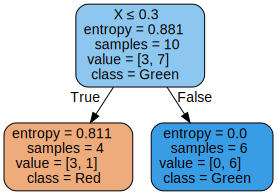

In [5]:
gen_button('Tree 1', mydt.plot_tree(1))

### So, you grew your first tree!

### Understanding a Decision Tree

There are a few important characteristics of your tree to take notice:

1. Performing ***one*** split means your Decision Tree has a ***depth*** of ***one***.
2. Each resulting node at this point is a ***leaf***, as they don't have any other nodes under them. 
3. Each ***leaf node*** will have a given number of samples (N_left and N_right). These are the ***samples per leaf***.
4. The difference between ***entropy before and after*** is your ***information gain***.

#### Depth, Samples per Leaf and Information Gain are some of the criteria used to decide when to STOP growing a tree!

### Understanding its Nodes

Each node has two additional pieces of information (besides number of samples and entropy):
- value
- class

***Value*** is a list containing the number of samples belonging to each class. For instance, take the node on left side of the first split. Its value reads [3, 1], meaning it has 3 red samples and 1 green sample. 

***IMPORTANT***: This information allows you to compute the ***probability*** of a sample being ***green*** (for that node), which is 1 / 4 in the example.

***Class*** is the class to which the majority of samples in that node belong. For the same node, its class is ***red***, as it has 3 red samples and only 1 green sample.

### 2.2 Second Split

Once you're happy with your choice of threshold on the first split, you can work your way through the ***second split***.

If any of the resulting subsets in the first split has ***zero entropy***, your tree already ***succeeded in isolating a group of homogeneous samples***, so ***no more splitting*** on that branch is needed.

In [6]:
left1 = right1 = None
def prefunc1():
    global left1, right1
    left1, right1 = mydt.left_split, mydt.right_split
    fl1 = build_figure(left1, width=450)
    fr1 = build_figure(right1, width=450)

    vb1 = HBox((VBox(fl1, layout={'align_items': 'center'}),
                VBox(fr1, layout={'align_items': 'center'})))
    return vb1

In [7]:
gen_button('Second Split', prefunc1)

Button(description='Show Second Split', style=ButtonStyle())

    'data': [{'marker': {'color': 'black'},
              'mode':…

#### Questions:

1. What is the threshold that minimizes entropy? -1.1
2. Go back to the ***First Split*** and split it at ***-0.30*** threshold. Then click ***Hide*** and ***Show*** the second split to refresh it. Which threshold(s) minimize entropy? Is this better or worse? Better, but cannot look into future and know in advance what gain through next splits.

#### Second Split Result

If you minimized the entropy at every depth correctly, this is what your splits should look like:

Button(description='Show Tree 2', style=ButtonStyle())

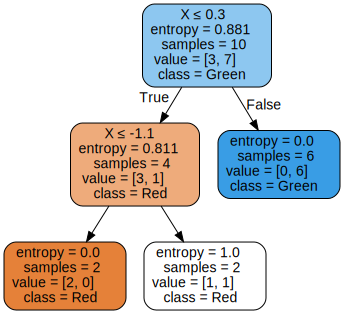

In [8]:
gen_button('Tree 2', mydt.plot_tree(2))

### 2.3 Third Split

Before proceeding, go back to the ***first split*** and choose the threshold that minimizes its entropy. Then ***refresh*** (by clicking Hide/Show) the ***second split*** and choose its threshold as well.

Once you're done with it, you can work your way through the ***third split***.

NOTE: the ***third split*** operates on the ***leftmost branch of the tree*** only! If you chose the correct thresholds, its right branch from the top should have green samples only (check ***Tree 2***).

In [9]:
left2 = right2 = None
def prefunc2():
    global left2, right2
    left2, right2 = left1.left_split, left1.right_split
    fl1l2 = build_figure(left2, width=450)
    fl1r2 = build_figure(right2, width=450)

    vb2 = HBox((VBox(fl1l2, layout={'align_items': 'center'}),
                VBox(fl1r2, layout={'align_items': 'center'})))

    return vb2

In [10]:
gen_button('Third Split', prefunc2)

Button(description='Show Third Split', style=ButtonStyle())

    'data': [],
    'layout': {'autosize': False,
               …

#### Questions:

1. What is the threshold that minimizes entropy?
2. Can you grow your tree further? If yes, what's the next step? If no, why not?

#### Third Split Result

If you minimized the entropy at every depth correctly, this is what your splits should look like:

Button(description='Show Tree 3', style=ButtonStyle())

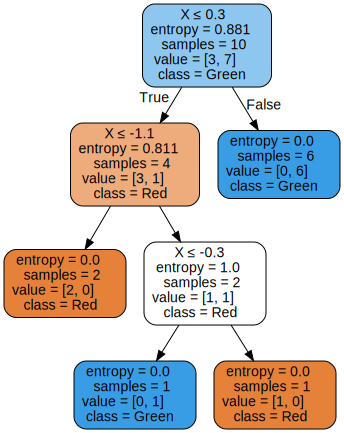

In [11]:
gen_button('Tree 3', mydt.plot_tree(3))

#### More Questions:

3. What is the depth of ***Tree 3***? 3
4. How many ***leaf nodes*** does it have? 4
5. What do all those ***leaf*** nodes have in common? Zero entropy!

## 3. Prediction

Once you have built your Decision Tree, you can take any numerical coordinate (your ***feature***), ***follow the splits*** and arrive at a corresponding ***leaf node***.

At the leaf node, you can check its ***class*** to get the predicted class straight away. Moreover, you can use its ***values*** to compute the probability associated with the predicted class (if you don't remember how to do it, revisit the ***Understanding its Nodes*** section above).

#### Questions:

1. What are the ***probabilities*** associated with the predicted class for each one of the ***4 leaf nodes*** on ***Tree 3***? 100 %
2. What about the ***3 leaf nodes*** on ***Tree 2***?

Once you answered those questions, click on the button below.

In [12]:
gen_button('Probabilities', VBox(build_figure_prob(mydt), layout={'align_items': 'center'}))

Button(description='Show Probabilities', style=ButtonStyle())

    'data': [{'marker': {'color': 'black'},
              'mode': 'lines',
     …

#### More Questions:

3. What happens if you choose a ***shallow*** tree (low depth)? What's the impact on predictions?
It's kind of regularization.


4. What about a ***deep*** tree (high depth)?
Overfitting


5. What about an average depth?
Maybe best to have something between shallow and deep.


6. Which one do you think will yield better predictions for unseen data? Why?
Crossvalidation for optimal level. Makes some errors but generalizes well.

## 4. Scikit-Learn

[Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

Please check Aurelién Geron's "Hand-On Machine Learning with Scikit-Learn and Tensorflow" notebook on Decision Trees [here](http://nbviewer.jupyter.org/github/ageron/handson-ml/blob/master/06_decision_trees.ipynb)

See Scikit-Learn website for [tips on practical use](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

## 5. More Resources

[InfoGraphic](https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Info-graphs/Day%2023.jpg)

[A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

[Interactive Visualization of Decision Trees with Jupyter Widgets](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

#### This material is copyright Daniel Voigt Godoy and made available under the Creative Commons Attribution (CC-BY) license ([link](https://creativecommons.org/licenses/by/4.0/)). 

#### Code is also made available under the MIT License ([link](https://opensource.org/licenses/MIT)).

In [ ]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')